<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:130%; text-align:left">

<h2 align="left"><font color=#ff6200>Laptop Price Prediction:</font></h2>

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors
from scipy.stats import linregress
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from tabulate import tabulate
from collections import Counter

%matplotlib inline

In [2]:
df=pd.read_csv('laptop_data.csv')

In [3]:
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [5]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [6]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [7]:

# Summary statistics for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Inches,1303.0,15.017191,1.426304,10.10,14.00,15.60,15.6000,18.40
Price,1303.0,59870.042910,37243.201786,9270.72,31914.72,52054.56,79274.2464,324954.72


In [8]:
# Summary statistics for categorical variables
df.describe(include='object').T

,count,unique,top,freq
Company,1303,19,Dell,297
TypeName,1303,6,Notebook,727
ScreenResolution,1303,40,Full HD 1920x1080,507
Cpu,1303,118,Intel Core i5 7200U 2.5GHz,190
Ram,1303,9,8GB,619
Memory,1303,39,256GB SSD,412
Gpu,1303,110,Intel HD Graphics 620,281
OpSys,1303,9,Windows 10,1072
Weight,1303,179,2.2kg,121


In [9]:
missing_data = df.isnull().sum()

In [10]:
missing_data

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

Hence no null value

In [11]:
# Finding duplicate rows (keeping all instances)
duplicate_rows = df[df.duplicated(keep=False)]

# Sorting the data by certain columns to see the duplicate rows next to each other
duplicate_rows_sorted = duplicate_rows.sort_values(by=[ 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'])

# Displaying the first 10 records
duplicate_rows_sorted.head(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1263,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg,15397.9200
1277,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg,15397.9200
1291,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg,15397.9200
1172,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.3200
1274,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.3200
1288,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.3200
1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.3200
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,38378.6496
1283,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,38378.6496
1297,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,38378.6496


In [12]:
print(f"The dataset contains {df.duplicated().sum()} duplicate rows that need to be removed.")

# Removing duplicate rows
df.drop_duplicates(inplace=True)

The dataset contains 29 duplicate rows that need to be removed.


In [13]:
df.shape

(1274, 11)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   object 
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   object 
 10  Price             1274 non-null   float64
dtypes: float64(2), object(9)
memory usage: 119.4+ KB


In [15]:
## remove gb and kg from Ram and weight and convert the cols to numeric
df['Ram'] = df['Ram'].str.replace("GB", "")
df['Weight'] = df['Weight'].str.replace("kg", "")
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [16]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int32  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float32
 10  Price             1274 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 109.5+ KB


## EDA

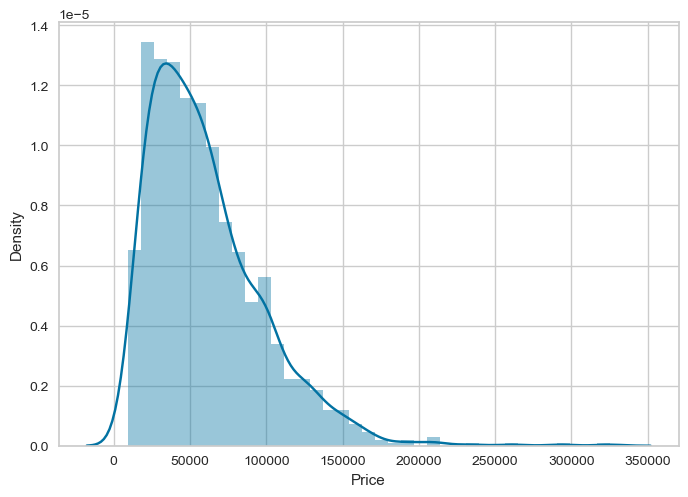

In [18]:
sns.distplot(df['Price'])
plt.show()

<Axes: xlabel='count', ylabel='Company'>

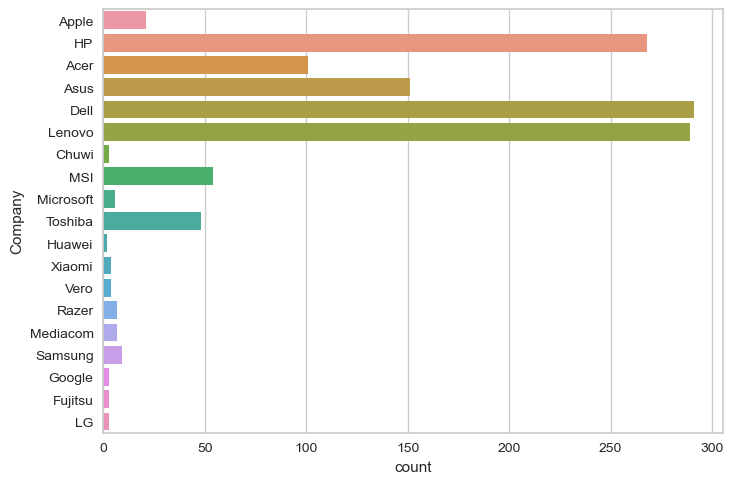

In [19]:
sns.countplot(y=df['Company'])

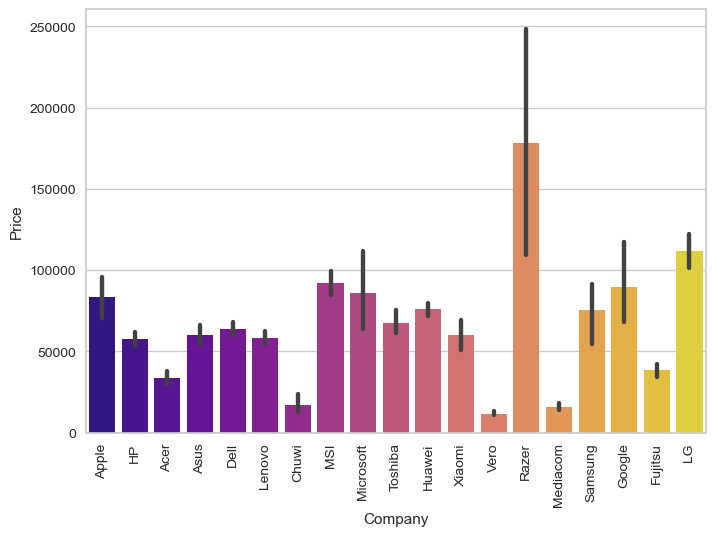

In [20]:
# avg price of each brand

sns.barplot(x=df['Company'], y=df['Price'],palette='plasma')

plt.xticks(rotation="vertical")

plt.show()

<Axes: xlabel='TypeName'>

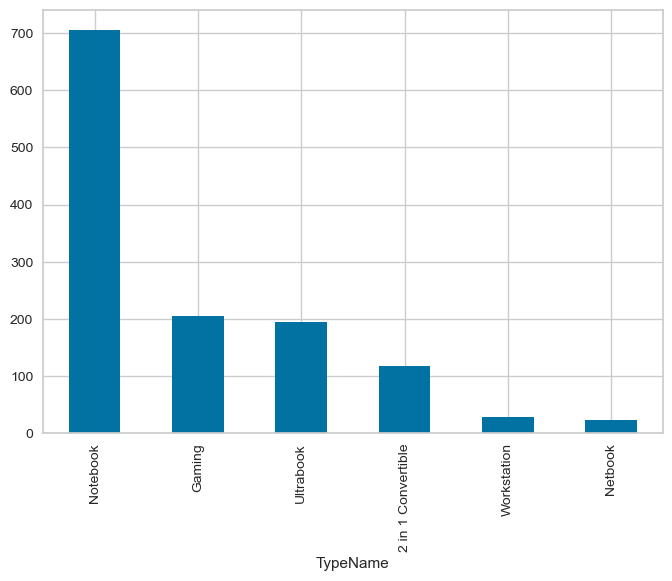

In [21]:
df['TypeName'].value_counts().plot(kind='bar')

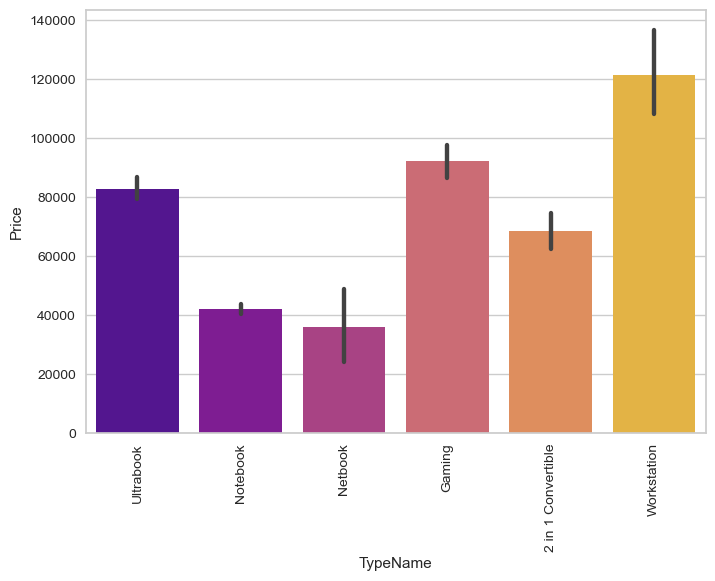

In [22]:
#type of laptop
sns.barplot(x=df['TypeName'], y=df['Price'],palette='plasma')
plt.xticks(rotation="vertical")
plt.show()

<Axes: xlabel='Inches'>

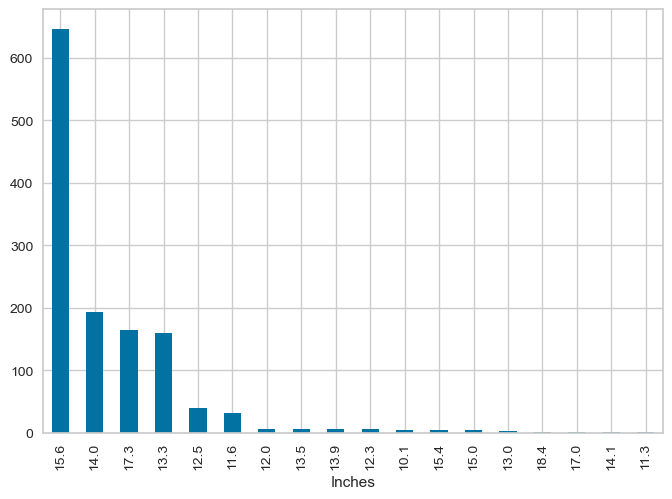

In [23]:
df['Inches'].value_counts().plot(kind='bar')

<Axes: xlabel='Inches', ylabel='Price'>

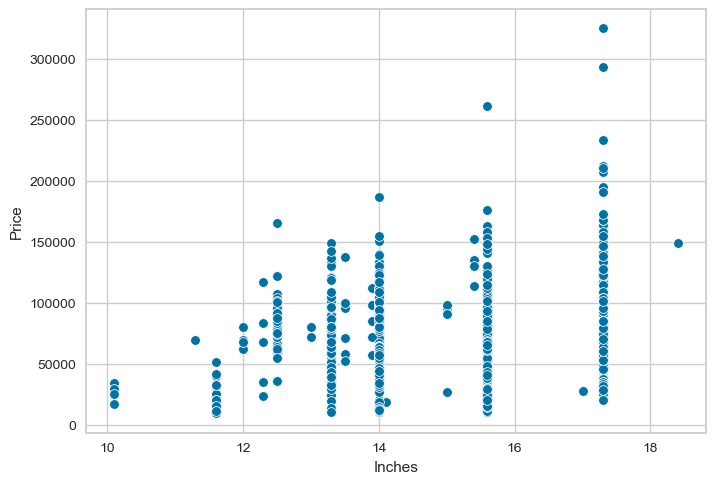

In [24]:
#price vary with laptop size in inches?
sns.scatterplot(x=df['Inches'],y=df['Price'])

In [25]:
#Extract Touch screen information
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                505
1366x768                                         262
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Quad HD+ / Touchscr

In [26]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda element:'Yes' if 'Touchscreen' in element else 'No')
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
1209,Asus,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.20,130482.720,No
1100,Dell,Ultrabook,12.5,1366x768,Intel Core i3 6100U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 7,1.50,60480.792,No
542,HP,Ultrabook,13.3,IPS Panel Quad HD+ 3200x1800,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.34,61005.600,No
468,HP,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,12,1TB HDD,Nvidia GeForce GTX 1060,Windows 10,3.78,90522.720,No
1172,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.20,19660.320,No
1041,Vero,Notebook,14.0,1366x768,Intel Atom X5-Z8350 1.44GHz,2,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.45,11231.424,No
270,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.9GHz,8,512GB SSD,Intel Iris Graphics 550,macOS,1.37,104370.192,No
7,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,61735.536,No
483,Chuwi,Notebook,15.6,Full HD 1920x1080,Intel Atom x5-Z8350 1.44GHz,4,64GB Flash Storage,Intel HD Graphics,Windows 10,1.89,13261.392,No
842,HP,Notebook,17.3,1600x900,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.63,48484.800,No


<Axes: xlabel='Touchscreen'>

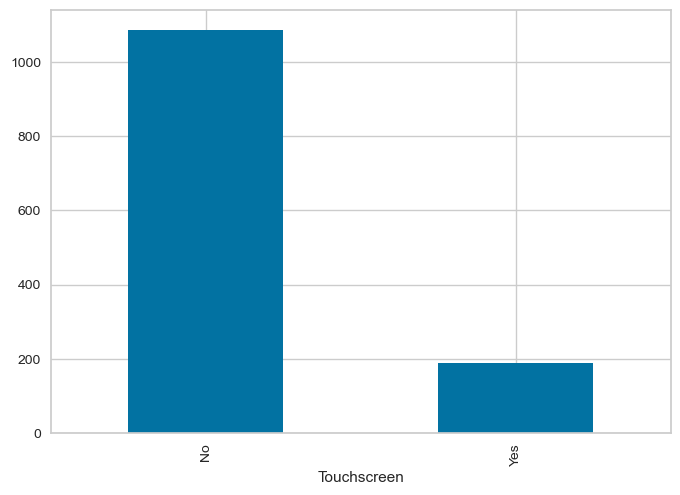

In [27]:
#Countplot for Touchscreen laptops
df['Touchscreen'].value_counts().plot(kind='bar')


<Axes: xlabel='Touchscreen', ylabel='Price'>

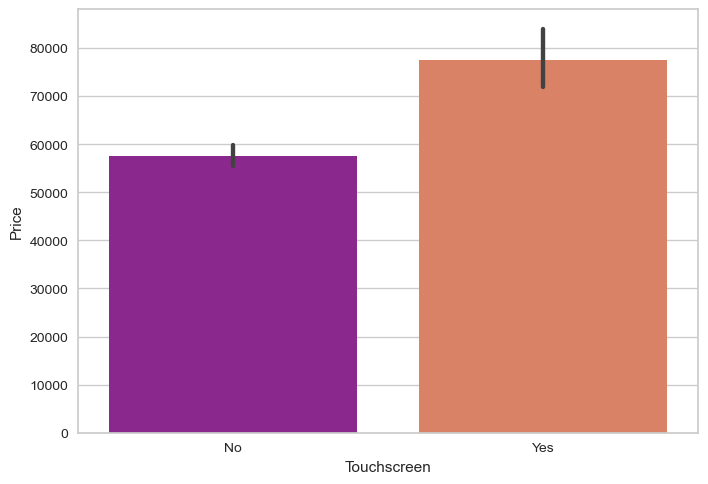

In [28]:
#Barplot - Price variation on Touch screen laptops
sns.barplot(x=df['Touchscreen'],y=df['Price'],palette='plasma')

In [29]:
#Extract IPS Channel presence information
df['IPS'] = df['ScreenResolution'].apply(lambda element:'Yes' if "IPS" in element else 'No')
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
197,HP,Notebook,13.3,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,512GB SSD,Intel UHD Graphics 620,Windows 10,1.49,51095.5200,No,No
275,Dell,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,12,1TB HDD,Intel HD Graphics 620,Windows 10,2.30,37992.3696,No,No
1246,Dell,Notebook,14.0,1366x768,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,1.60,46620.0000,No,No
1078,Lenovo,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.10,28771.2000,No,No
902,Dell,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i7 7Y75 1.3GHz,16,256GB SSD,Intel HD Graphics 615,Windows 10,1.22,87858.7200,Yes,No


<Axes: xlabel='IPS'>

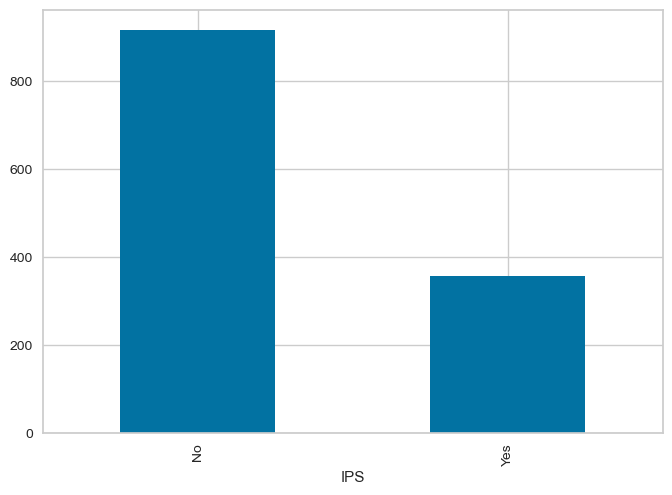

In [30]:
#Countplot for IPS laptops
df['IPS'].value_counts().plot(kind='bar')

<Axes: xlabel='IPS', ylabel='Price'>

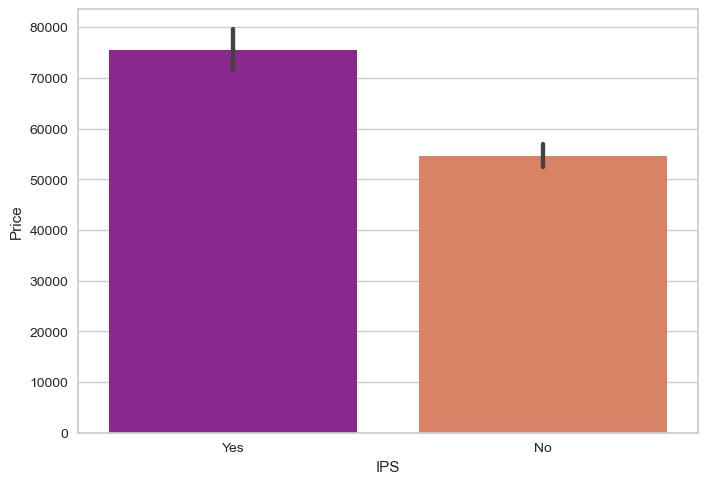

In [31]:
#Barplot - Price variation on IPS laptops
sns.barplot(x=df['IPS'],y=df['Price'],palette='plasma')

## Feature Engineering

Extracting the X Resolution and the Y Resolution

In [32]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,No,Yes
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,No,No
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,No,No
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,No,Yes
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.20,38378.6496,No,No
1270,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,Yes,Yes
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,Yes,Yes
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,No,No


In [33]:
# p=ppi()
# p.transform(df)
# df

In [34]:
df.corr(numeric_only=True)['Price'].sort_values(ascending=False)

Price     1.000000
Ram       0.740106
Weight    0.212192
Inches    0.066990
Name: Price, dtype: float64

In [35]:
#first we will extract Name of CPU which is first 3 words from Cpu column and then we will check which processor it is
def fetch_processor(x):
    cpu_name = " ".join(x.split()[0:3])
    if cpu_name == 'Intel Core i7' or cpu_name == 'Intel Core i5' or cpu_name == 'Intel Core i3':
        return cpu_name
    elif cpu_name.split()[0] == 'Intel':
        return 'Other Intel Processor'
    else:
        return 'AMD Processor'
df['Cpu_brand'] = df['Cpu'].apply(lambda x: fetch_processor(x))

In [36]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Cpu_brand
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,No,Yes,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,No,No,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,No,No,Intel Core i5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,No,Yes,Intel Core i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,No,Yes,Intel Core i5


<Axes: xlabel='Cpu_brand'>

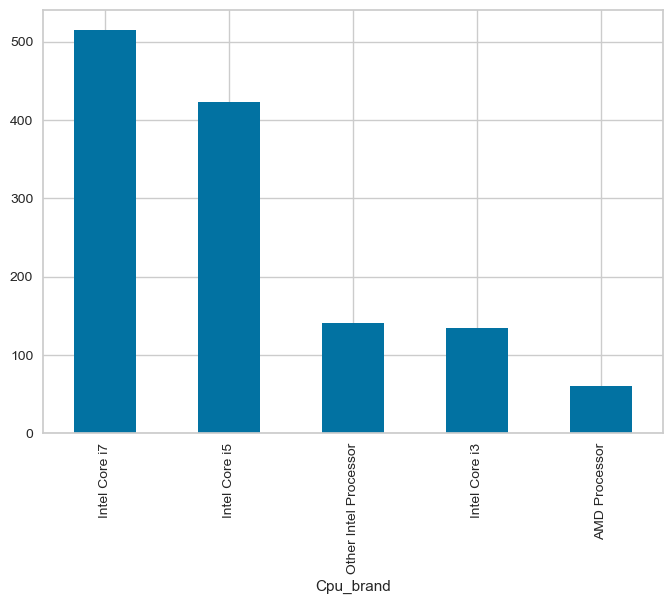

In [37]:
#Countplot for Cpu brand of laptops
df['Cpu_brand'].value_counts().plot(kind='bar')

<Axes: xlabel='Cpu_brand', ylabel='Price'>

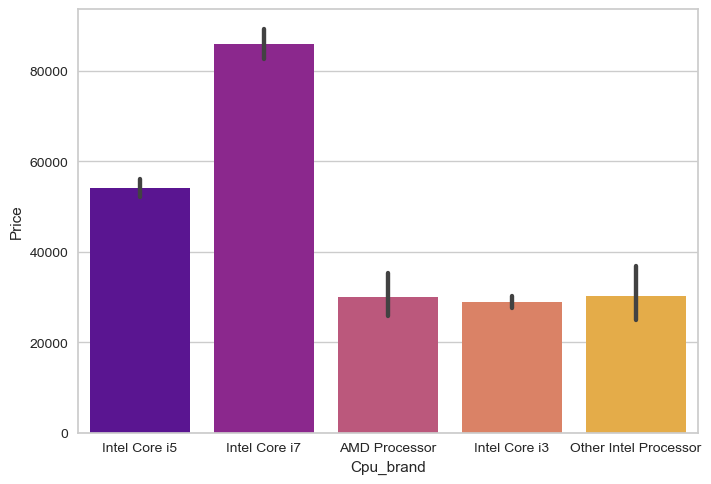

In [38]:
#Barplot - Price variation on Cpu brand of laptops
sns.barplot(x=df['Cpu_brand'],y=df['Price'],palette='plasma')

In [39]:
df.drop(['Cpu'],axis=1,inplace=True)
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Cpu_brand
873,Lenovo,Notebook,13.3,IPS Panel Full HD 1920x1080,4,180GB SSD,Intel HD Graphics 620,Windows 10,1.44,39160.8000,No,Yes,Intel Core i3
1065,Dell,Ultrabook,13.3,Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.29,77682.2400,No,No,Intel Core i7
936,Dell,Notebook,15.6,1366x768,4,1TB HDD,Intel HD Graphics 520,Windows 10,2.18,29762.2080,No,No,Intel Core i3
419,Lenovo,Ultrabook,14.0,IPS Panel Full HD 1920x1080,8,256GB SSD,AMD Radeon RX 550,Windows 10,1.75,64755.4464,No,Yes,Intel Core i7
1096,Dell,Notebook,15.6,Full HD 1920x1080,8,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36,34035.2640,No,No,Intel Core i5


<Axes: xlabel='Ram'>

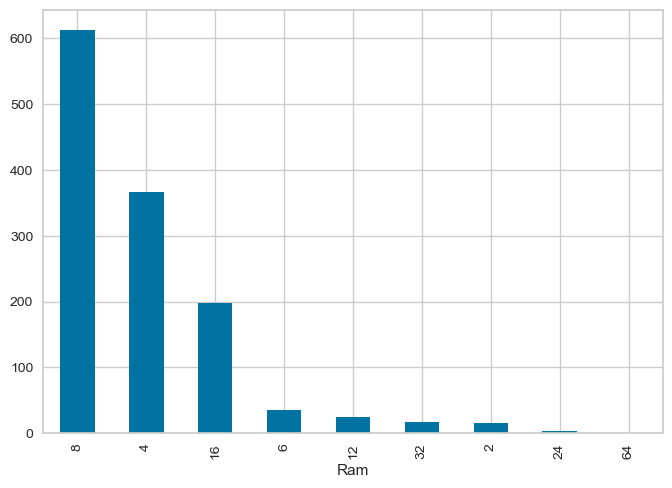

In [40]:
#Countplot for RAM of laptops
df['Ram'].value_counts().plot(kind='bar')

<Axes: xlabel='Ram', ylabel='Price'>

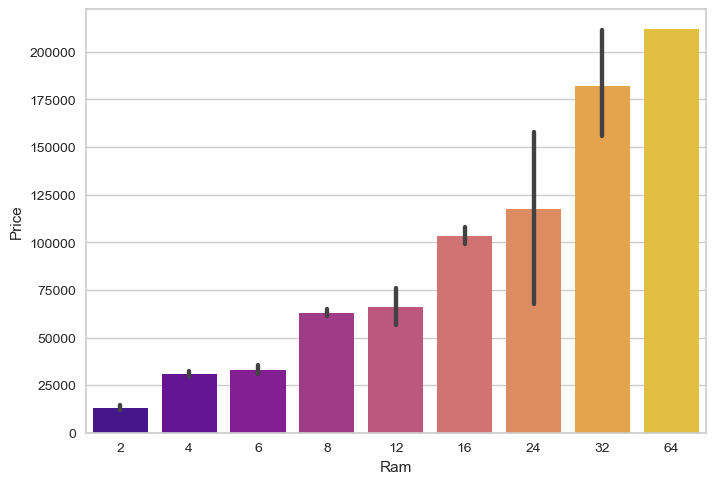

In [41]:
#Barplot - Price variation on RAM of laptops
sns.barplot(x=df['Ram'],y=df['Price'],palette='plasma')

In [42]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          215
500GB HDD                        123
512GB SSD                        114
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                36
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In here, we will do as follows,

*Four most common variants observed: HDD, SSD, Flash, Hybrid

*We will remove decimal space for example 1.0 TB will become 1TB

*We will replace the word GB with ""

*We will replace the word TB with "000"

*We will split the word across the "+" character

In [43]:
#preprocessing
df['Memory'] = df['Memory'].astype(str).replace('.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')

In [44]:
df["Memory"].sample(10)

933              1000 SSD
641              1000 HDD
628              1000 HDD
629               256 SSD
898              1000 HDD
220               256 SSD
1107              256 SSD
78               1000 HDD
707               512 SSD
1193    256 Flash Storage
Name: Memory, dtype: object

In [45]:
new = df["Memory"].str.split("+", expand = True)
new.sample(10)

,0,1
837,0 HDD,None
797,128 SSD,None
702,1000 HDD,None
568,0 HDD,None
781,256 SSD,1000 HDD
212,0 HDD,None
318,256 SSD,None
74,1000 HDD,None
753,1 SSD,None
892,256 SSD,None


In [46]:
df["first"]= new[0]
df["first"]=df["first"].str.strip()
df["first"].value_counts()

first
256 SSD              500
1000 HDD             217
128 SSD              170
512 SSD              134
0 HDD                123
32 Flash Storage      36
2000 HDD              16
1000 SSD              16
64 Flash Storage      14
256 Flash Storage      8
1000 Hybrid            7
16 Flash Storage       7
32 SSD                 6
1 SSD                  5
128 Flash Storage      4
16 SSD                 3
512 Flash Storage      2
2 SSD                  1
8 SSD                  1
64 SSD                 1
128 HDD                1
32 HDD                 1
8 Hybrid               1
Name: count, dtype: int64

In [47]:
df["second"]= new[1]
df["second"].value_counts()

second
  1000 HDD       185
  2000 HDD        15
  256 SSD          3
  0 HDD            2
  1000 Hybrid      2
  512 SSD          1
Name: count, dtype: int64

In [48]:
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1HDD"].value_counts()

Layer1HDD
0    916
1    358
Name: count, dtype: int64

In [49]:
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1SSD"].value_counts()

Layer1SSD
1    837
0    437
Name: count, dtype: int64

In [50]:


df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)
df['first'] = df['first'].str.replace(r'\D', '',regex=True)
df["second"].fillna("0", inplace = True)
df['first']

0        128
1        128
2        256
3        512
4        256
        ... 
1269       0
1270     128
1271     512
1272      64
1273    1000
Name: first, Length: 1274, dtype: object

In [51]:
#binary encoding
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)


In [52]:
# Clean 'second' column to retain only digits
df['second'] = df['second'].str.replace(r'\D', '',regex=True)
df['second'].value_counts()

second
0       1068
1000     187
2000      15
256        3
512        1
Name: count, dtype: int64

In [53]:
# Convert 'first' column to integers directly
df["first"] = pd.to_numeric(df["first"]).astype(int)

# Convert 'second' column to integers
df["second"] = pd.to_numeric(df["second"]).astype(int)


In [54]:
#finalize the columns by keeping value
df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])


In [55]:
#Drop the un required columns
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)


In [56]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Cpu_brand,HDD,SSD,Hybrid,Flash_Storage
382,Asus,Gaming,15.6,IPS Panel Full HD 1920x1080,8,128 SSD + 1000 HDD,Nvidia GeForce GTX 1060,Windows 10,2.30,88178.4000,No,Yes,Intel Core i7,1000,128,0,0
753,Lenovo,Ultrabook,14.0,Full HD 1920x1080,4,1 SSD,Intel HD Graphics 520,Windows 10,1.70,58394.8800,No,No,Intel Core i5,0,1,0,0
136,Lenovo,Notebook,15.6,1366x768,4,1000 HDD,Intel HD Graphics 500,No OS,1.90,13445.7408,No,No,Other Intel Processor,1000,0,0,0
1029,HP,Notebook,17.3,Full HD 1920x1080,8,256 SSD,Nvidia GeForce 930MX,Windows 10,2.63,57542.4000,No,No,Intel Core i5,0,256,0,0
818,Dell,Gaming,17.3,IPS Panel Full HD 1920x1080,16,128 SSD + 1000 HDD,Nvidia GeForce GTX 1060,Windows 10,4.36,133467.4656,No,Yes,Intel Core i7,1000,128,0,0


In [57]:
df.drop(columns=['Memory'],inplace=True)

In [58]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Cpu_brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,No,Yes,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,13.3,1440x900,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,No,No,Intel Core i5,0,0,0,128
2,HP,Notebook,15.6,Full HD 1920x1080,8,Intel HD Graphics 620,No OS,1.86,30636.0000,No,No,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,No,Yes,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,No,Yes,Intel Core i5,0,256,0,0


In [59]:

df.corr(numeric_only=True)['Price']

Inches           0.066990
Ram              0.740106
Weight           0.212192
Price            1.000000
HDD             -0.032324
SSD              0.665836
Hybrid           0.023741
Flash_Storage   -0.037176
Name: Price, dtype: float64

In [60]:
df.drop(columns = ['Hybrid','Flash_Storage'],inplace=True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Cpu_brand,HDD,SSD
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,No,Yes,Intel Core i5,0,128
1,Apple,Ultrabook,13.3,1440x900,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,No,No,Intel Core i5,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,8,Intel HD Graphics 620,No OS,1.86,30636.0000,No,No,Intel Core i5,0,256
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,No,Yes,Intel Core i7,0,512
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,No,Yes,Intel Core i5,0,256


In [61]:
#Analysis on GPU
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      279
Intel HD Graphics 520      181
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [62]:
#Extracting the GPU brands
a = df['Gpu'].iloc[1]
print(a.split()[0])

Intel


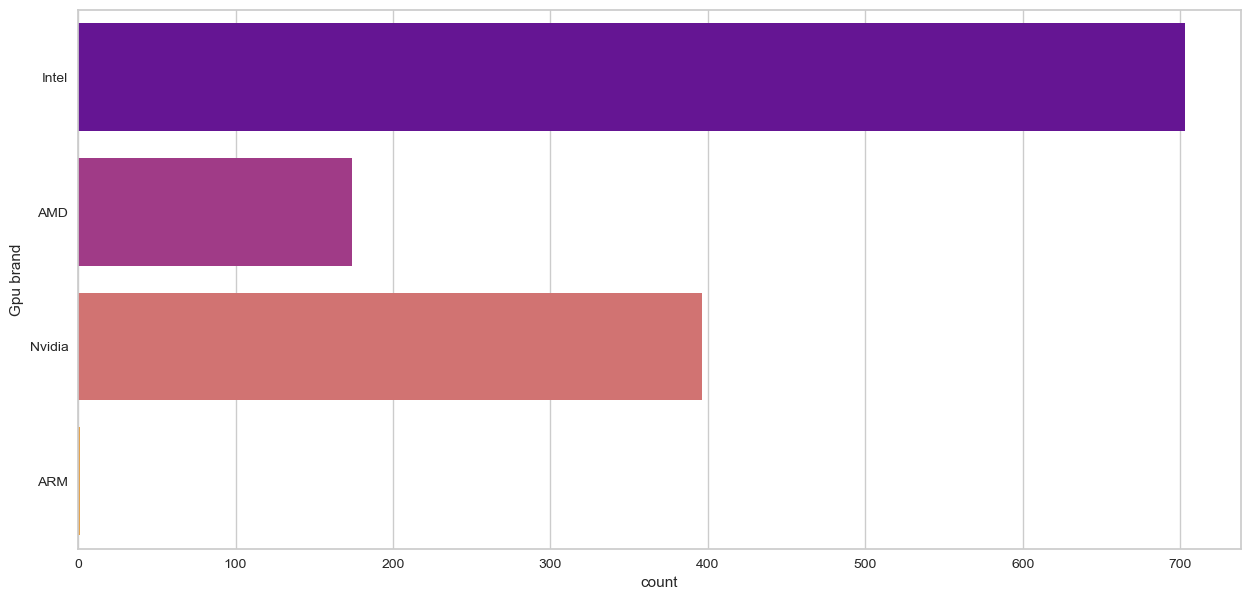

Gpu brand
Intel     703
Nvidia    396
AMD       174
ARM         1
Name: count, dtype: int64

In [63]:
plt.figure(figsize=(15,7))
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])
sns.countplot(y=df['Gpu brand'],palette='plasma')
plt.show()
df['Gpu brand'].value_counts()

In [64]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     703
Nvidia    396
AMD       174
ARM         1
Name: count, dtype: int64

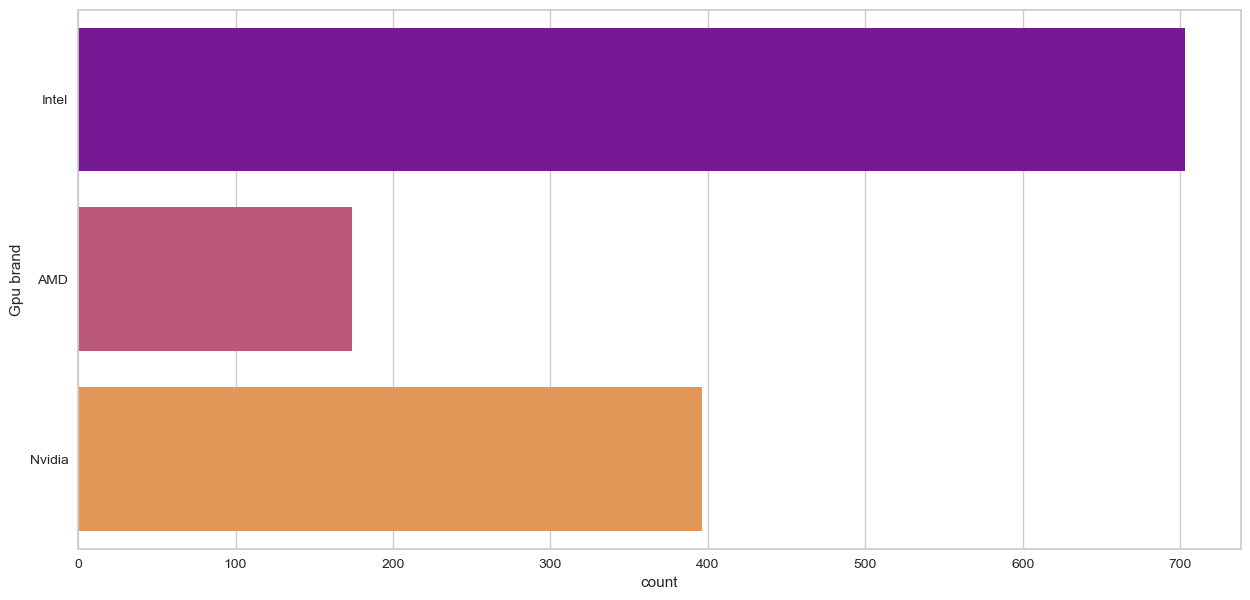

In [65]:
plt.figure(figsize=(15,7))
df = df[df['Gpu brand']!='ARM']
sns.countplot(y=df['Gpu brand'],palette='plasma')
plt.show()

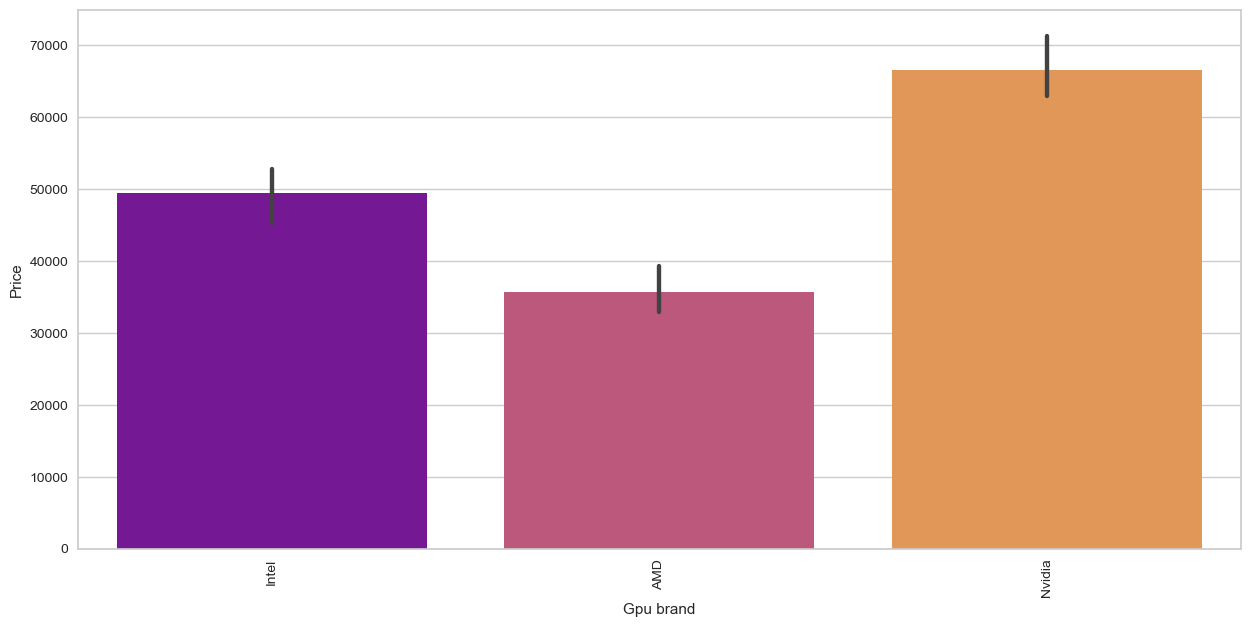

In [66]:
plt.figure(figsize=(15,7))
sns.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median,palette='plasma')
plt.xticks(rotation='vertical')
plt.show()

In [67]:
df = df.drop(columns=['Gpu'])
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,OpSys,Weight,Price,Touchscreen,IPS,Cpu_brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,71378.6832,No,Yes,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,13.3,1440x900,8,macOS,1.34,47895.5232,No,No,Intel Core i5,0,0,Intel
2,HP,Notebook,15.6,Full HD 1920x1080,8,No OS,1.86,30636.0000,No,No,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,macOS,1.83,135195.3360,No,Yes,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,96095.8080,No,Yes,Intel Core i5,0,256,Intel


In [68]:
#Operating System Column
df['OpSys'].value_counts()

OpSys
Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

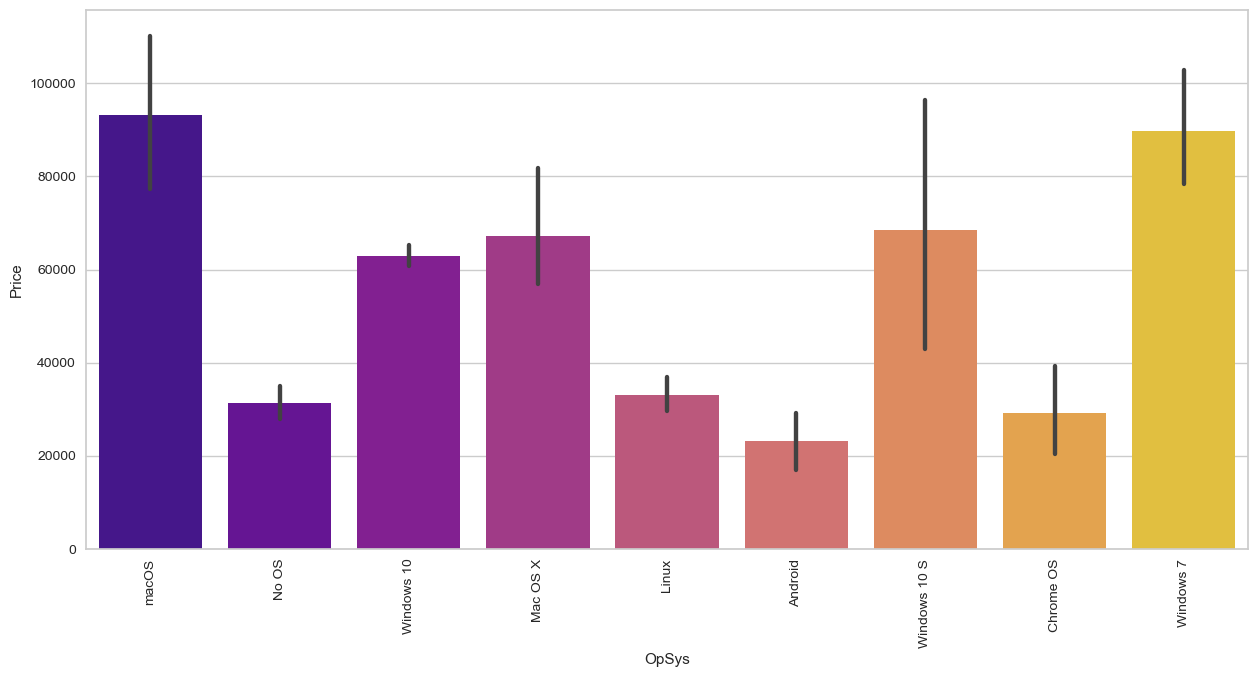

In [69]:
plt.figure(figsize=(15,7))
sns.barplot(x=df['OpSys'],y=df['Price'],palette='plasma')
plt.xticks(rotation = 'vertical')
plt.show()

In [70]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

We can see that there are many versions of one type of OS, espicially for Windows and macOS. So we can club them together like,

club {Windows 10,Windows 7,Windows 7 S}-->Windows

club {macOS,mac OS X}--> mac

others --> others

In [71]:
#Get which OP sys
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'
df['os'] = df['OpSys'].apply(cat_os)
df.drop(columns=['OpSys'],inplace=True)

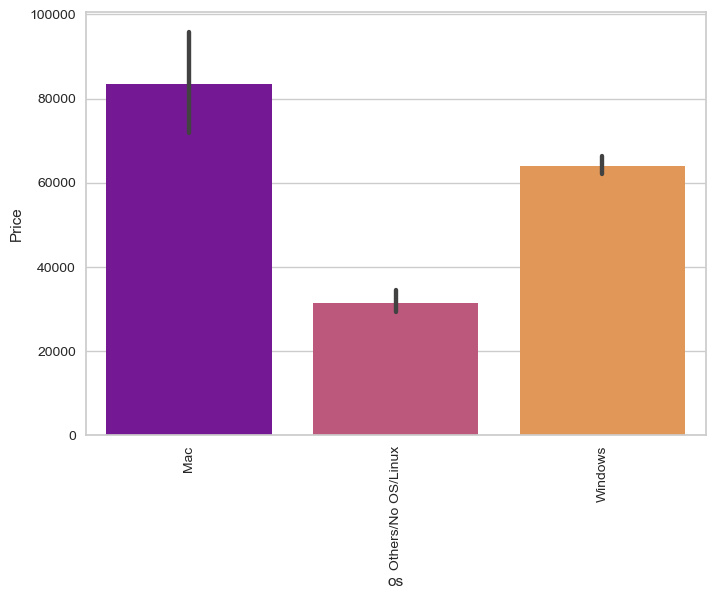

In [72]:
sns.barplot(x=df['os'],y=df['Price'],palette='plasma')
plt.xticks(rotation='vertical')
plt.show()

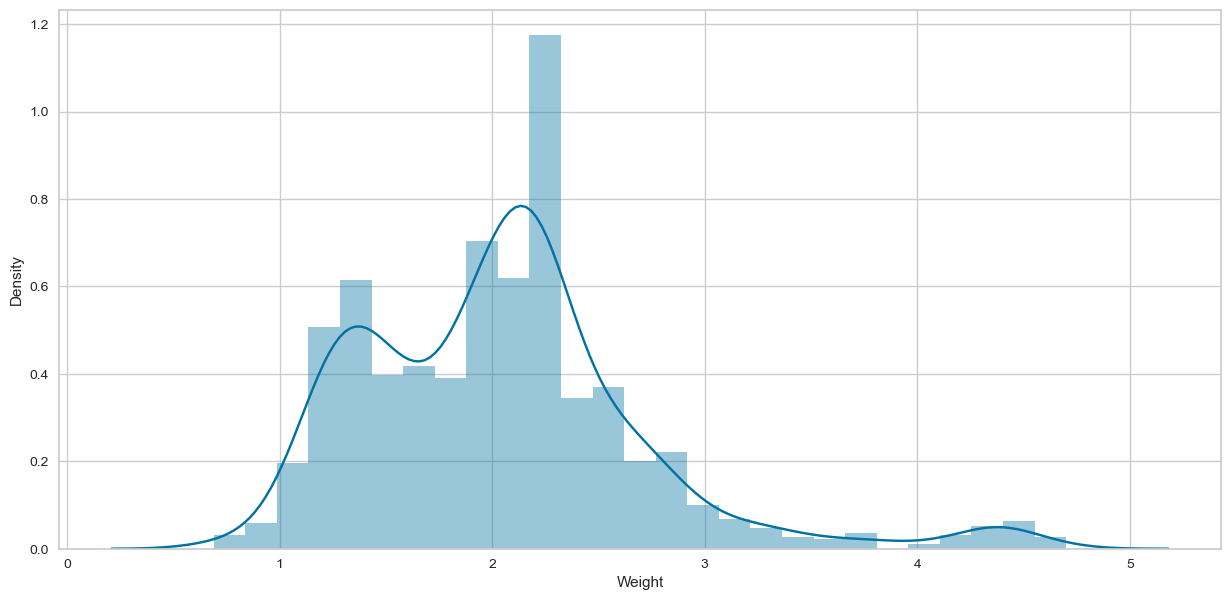

In [73]:
#Weight analysis
plt.figure(figsize=(15,7))
sns.distplot(df['Weight'])
plt.show()


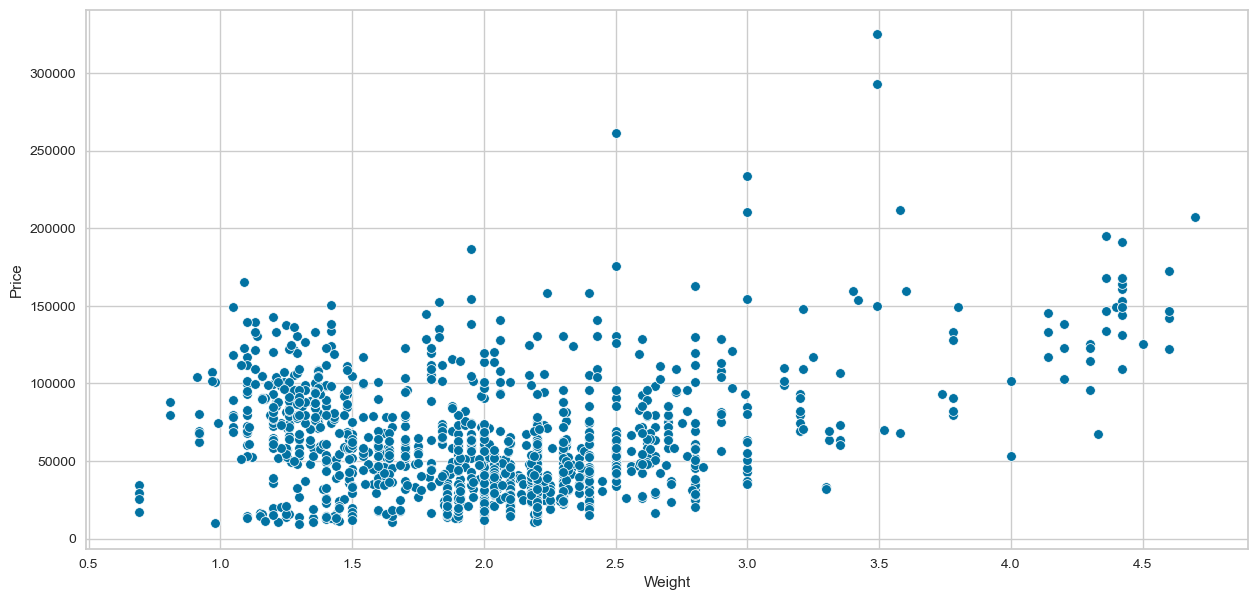

In [74]:
#Scatterplot - Price variation on weight
plt.figure(figsize=(15,7))
sns.scatterplot(x=df['Weight'],y=df['Price'])
plt.show()


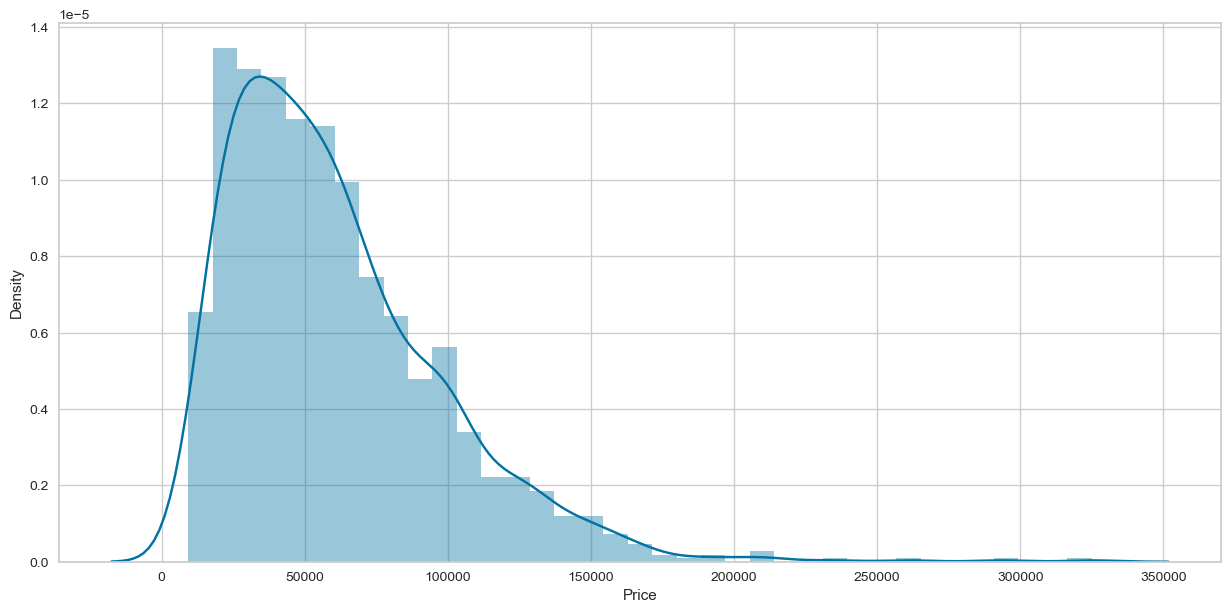

In [75]:
#Price analysis
plt.figure(figsize=(15,7))
sns.distplot(df['Price'])
plt.show()

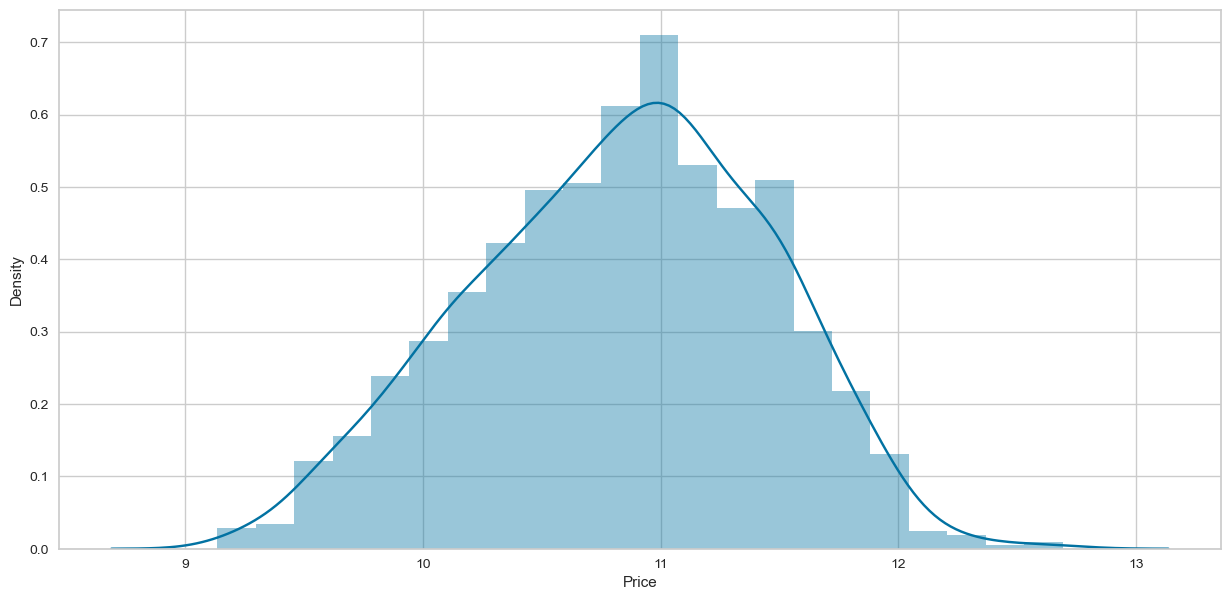

In [76]:
#apply np.log to get guassian distribution of price column
plt.figure(figsize=(15,7))
sns.distplot(np.log(df['Price']))
plt.show()

In [77]:
df.corr(numeric_only=True)['Price']

Inches    0.066079
Ram       0.739996
Weight    0.211667
Price     1.000000
HDD      -0.032703
SSD       0.665684
Name: Price, dtype: float64

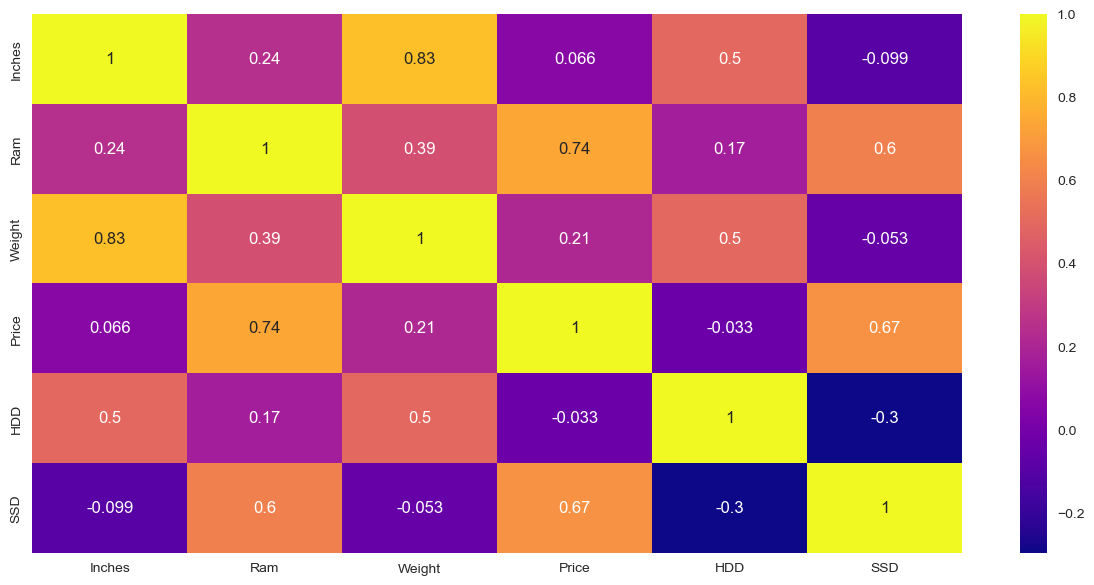

In [78]:
#Heatmap - Correlation for each features
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='plasma')
plt.show()

## Model Building

In [79]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [80]:
X

,Company,TypeName,Inches,ScreenResolution,Ram,Weight,Touchscreen,IPS,Cpu_brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,1.37,No,Yes,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,13.3,1440x900,8,1.34,No,No,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,15.6,Full HD 1920x1080,8,1.86,No,No,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,1.83,No,Yes,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,1.37,No,Yes,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,4,2.20,No,No,Intel Core i7,0,0,Nvidia,Windows
1270,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,4,1.80,Yes,Yes,Intel Core i7,0,128,Intel,Windows
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,16,1.30,Yes,Yes,Intel Core i7,0,512,Intel,Windows
1272,Lenovo,Notebook,14.0,1366x768,2,1.50,No,No,Other Intel Processor,0,0,Intel,Windows


In [81]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1269    10.555257
1270    10.433899
1271    11.288115
1272     9.409283
1273    10.614129
Name: Price, Length: 1273, dtype: float64

In [113]:
from sklearn.model_selection import train_test_split,GridSearchCV
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [83]:
X_train

,Company,TypeName,Inches,ScreenResolution,Ram,Weight,Touchscreen,IPS,Cpu_brand,HDD,SSD,Gpu brand,os
716,Dell,Notebook,15.6,Full HD 1920x1080,8,1.90,No,No,Intel Core i5,0,256,Intel,Windows
21,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,8,2.50,No,Yes,Intel Core i5,1000,128,Nvidia,Windows
968,Dell,Gaming,17.3,IPS Panel Full HD 1920x1080,32,4.42,No,Yes,Intel Core i7,1000,256,Nvidia,Windows
273,Lenovo,2 in 1 Convertible,14.0,Touchscreen 2560x1440,16,1.36,Yes,No,Intel Core i7,0,512,Intel,Windows
1234,Apple,Ultrabook,11.6,1366x768,4,1.08,No,No,Intel Core i5,0,0,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,15.6,1366x768,4,2.20,No,No,Intel Core i3,0,0,Nvidia,Windows
299,Asus,Ultrabook,15.6,Full HD 1920x1080,16,1.63,No,No,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,15.6,1366x768,8,2.20,No,No,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,15.6,1366x768,8,2.20,No,No,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux


In [84]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [85]:
from sklearn.base import TransformerMixin,BaseEstimator
class ppi(TransformerMixin,BaseEstimator):
    def fit(self, df,y=None):
        return self
    def transform(self, df,y=None):
        splitdf = df['ScreenResolution'].str.split('x',n = 1,expand=True)
        df['X_res'] = splitdf[0]
        df['Y_res'] = splitdf[1]
        df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+.?\d+)').apply(lambda x:x[0])
        df['X_res'] = df['X_res'].astype('int')
        df['Y_res'] = df['Y_res'].astype('int')
        df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')
        df.drop(columns = ['ScreenResolution', 'Inches','X_res','Y_res'], inplace=True)
        return df

In [87]:
step1 = ColumnTransformer(transformers=[
    ('ppi_tnf',ppi(),['ScreenResolution', 'Inches']),
    ('lb_tnf',OrdinalEncoder(),['Touchscreen', 'IPS']),
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),['Company', 'TypeName','Cpu_brand','Gpu brand',
       'os'])
],remainder='passthrough')

# Linear regression

In [120]:
step2 = LinearRegression(fit_intercept=False)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.7813375690279012
MAE 0.22251605988544787


# Ridge Regression

In [126]:
step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.7936565446997575
MAE 0.21916289042666592


# Lasso Regression

In [134]:
step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.7913935663445505
MAE 0.21945248379491275


# KNN

In [139]:
step2 = KNeighborsRegressor(n_neighbors=7)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.8126099839173342
MAE 0.20211510638432204


# Decision Tree

In [144]:
step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.8022940733377244
MAE 0.20539920594718772


# SVM

In [146]:
step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.8296801105696637
MAE 0.1983131272887859


# Random Forest

In [147]:
step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.8,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.8492446945274438
MAE 0.17414653297853416


# ExtraTrees

In [148]:
step2 = ExtraTreesRegressor(n_estimators=1000,
                              random_state=3,
                            bootstrap=True,
                              max_samples=0.8,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.8600375015654581
MAE 0.17525939699586673


# AdaBoost

In [149]:
step2 = AdaBoostRegressor(n_estimators=17,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.7876043005340947
MAE 0.22704763004195827


# Gradient Boost

In [150]:
step2 = GradientBoostingRegressor(n_estimators=1000)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.8413754493052319
MAE 0.17269109774249228


# XgBoost

In [151]:
step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.857489938797313
MAE 0.1744252033803172


# Voting Regressor

In [167]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

rf =  RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.8,
                              max_features=0.75,
                              max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=1000)
xgb = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)
et = ExtraTreesRegressor(n_estimators=1000,
                              random_state=3,
                            bootstrap=True,
                              max_samples=0.8,
                              max_features=0.75,
                              max_depth=15)
estimators=[('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)]
step2 = VotingRegressor(estimators=estimators,weights=[1,1,5,4])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8680522717929606
MAE 0.16458524647292225


In [169]:
step2 = StackingRegressor(estimators=estimators, final_estimator=ExtraTreesRegressor(n_estimators=1000,random_state=3,bootstrap=True,max_samples=0.8,max_features=0.75,max_depth=15))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8706003667470484
MAE 0.1606921715177043


In [171]:
pipe

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ppi_tnf', ppi(),
                                                  ['ScreenResolution',
                                                   'Inches']),
                                                 ('lb_tnf', OrdinalEncoder(),
                                                  ['Touchscreen', 'IPS']),
                                                 ('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Company', 'TypeName',
                                                   'Cpu_brand', 'Gpu brand',
                                                   'os'])])),
                ('step2',
                 StackingRegressor(estimators=[('rf',
                                                RandomForestRegress...
                                                             multi_strategy=None,
                                                             n_estimators=45,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=None, ...)),
                                               ('et',
                                                ExtraTreesRegressor(bootstrap=True,
                                                                    max_depth=15,
                                                                    max_features=0.75,
                                                                    max_samples=0.8,
                                                                    n_estimators=1000,
                                                                    random_state=3))],
                                   final_estimator=ExtraTreesRegressor(bootstrap=True,
                                                                       max_depth=15,
                                                                       max_features=0.75,
                                                                       max_samples=0.8,
                                                                       n_estimators=1000,
                                                                       random_state=3)))])

In [170]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))